This code is ...

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
import seaborn as sns
sns.set()
from pyarabic.araby import strip_tashkeel, strip_tatweel

In [3]:
def get_statistics(text_file, delete_tashkeel=True, delete_symbols=True):
    characters = []
    with open(text_file, 'r',  encoding = "utf_8") as file:
        # Reading each line     
        for line in file:
            # If delete_tashkeel is = True, delete them (default value is True)
            if(delete_tashkeel):
                line = strip_tashkeel(line)
            # Delete tatweel character, such as: العـــــــــــربية >> العربية
            line = strip_tatweel(line)
            # If delete symbols is = True, delete them (default value is True)
            if(delete_symbols):
                line = re.sub(r'[^\w]', '', line)
            # Reading each word         
            for word in line.split(): 
                # Reading each character
                for char in word:
                    characters.append(char)
    
    # Create pandas DataFrame to perform the statistics
    characters_pd = pd.DataFrame(characters, columns=['Char'])
    characters_ordered = characters_pd.groupby('Char')
    # Print the count of each charatcer
    print("Count of each charatcer: ", characters_ordered['Char'].value_counts())
    
    # Plot the count of each charatcer, ordered from the highest to the lowest
    plt.subplots(figsize=[20, 10])
    plt.yticks(np.arange(0, len(characters), round(len(characters)/50)))
    ax = sns.countplot(x='Char', data=characters_pd, order = characters_pd['Char'].value_counts().index, palette="Blues_d")
    plt.show()

Count of each charatcer:  Char  Char
ء     ء         3
أ     أ        18
ؤ     ؤ         1
إ     إ         3
ا     ا       103
ب     ب        31
ة     ة         4
ت     ت        44
ث     ث         3
ج     ج         4
ح     ح        13
خ     خ         3
د     د        12
ذ     ذ        10
ر     ر        29
ز     ز         8
س     س        16
ش     ش         6
ص     ص         5
ض     ض         4
ط     ط        10
ظ     ظ         2
ع     ع        17
غ     غ         2
ف     ف        21
ق     ق        18
ك     ك        25
ل     ل        74
م     م        45
ن     ن        41
ه     ه        40
و     و        53
ى     ى         7
ي     ي        42
Name: Char, dtype: int64


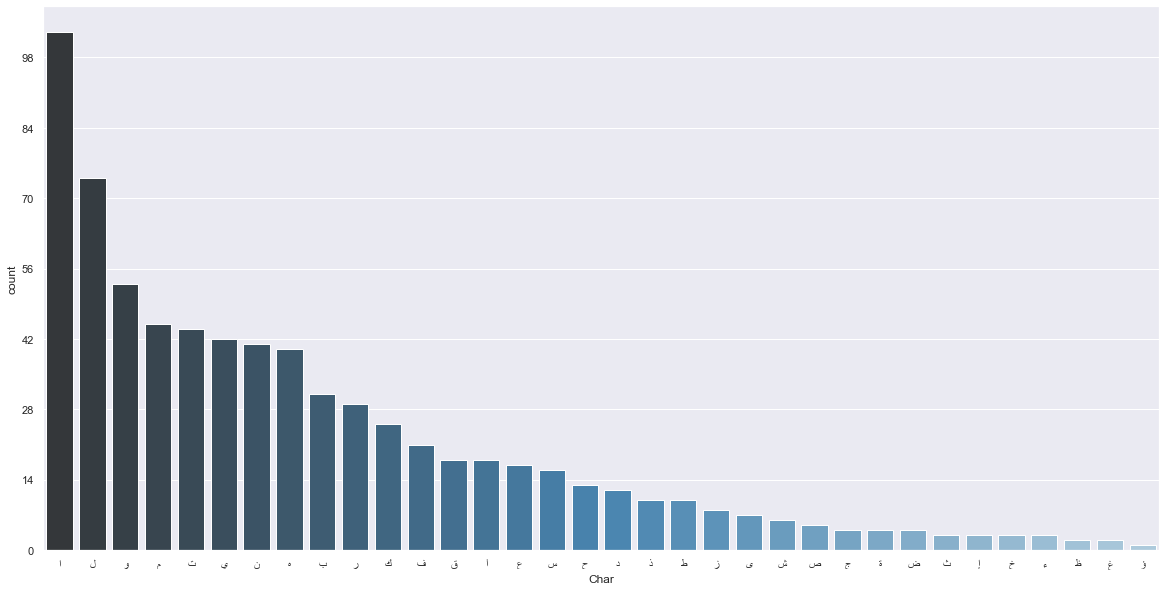

In [4]:
get_statistics("text.txt")